In [1]:
## MP 573 Lecture 7: Fourier Transform in N Dimensions
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg

In [2]:
## Let's create some signals
# Blank image
n = 401
p = np.zeros ((n, n))
FOV = 40

# Create the pixel grid and simple image
y, x = np.mgrid[-40/2:40/2:(1j*n), -40/2:40/2:(1j*n)]
f = np.less(np.abs(x*x*0.3) + np.abs(y*y*0.03),1)

# Create the corresponding frequency grid
du = 2/FOV
u = du*np.linspace(1,n,n)
u = u - np.mean(u)




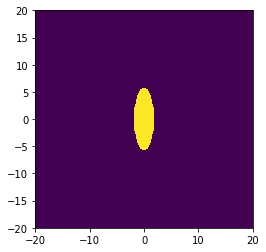

In [3]:
imgplot = plt.imshow(abs(f), extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])

In [4]:
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))

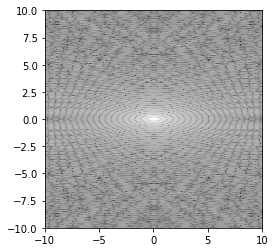

In [5]:
imgplot = plt.imshow(np.log(abs(fhat)),extent = [u[0], u[n-1], u[0], u[n-1]],cmap='gray')


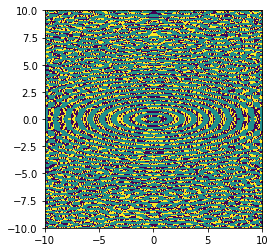

In [6]:
imgplot = plt.imshow(np.angle(fhat),extent = [u[0], u[n-1], u[0], u[n-1]])

In [7]:
# Load some image from file
#import h5py
#hdf5_path = 'dataset.hdf5'
#brain_dataset = h5py.File(hdf5_path, "r")
from os.path import dirname, join as pjoin
import scipy.io as sio
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_fourier.mat')
mat_contents = sio.loadmat(mat_fname)
fhat = mat_contents['dataLR']

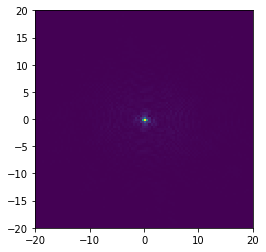

In [8]:
imgplot = plt.imshow(abs(fhat), extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])

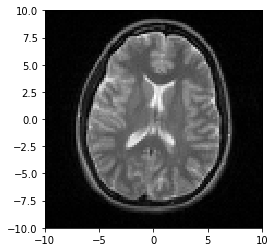

In [9]:
f = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat)))
imgplot = plt.imshow(abs(f),extent = [u[0], u[n-1], u[0], u[n-1]],cmap='gray')

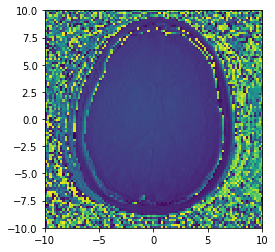

In [10]:
imgplot = plt.imshow(np.angle(f),extent = [u[0], u[n-1], u[0], u[n-1]])

In [14]:
# Now add some artifact to the data
fhat2 = fhat
#fhat2[70,60] = fhat2[70,60] + 40
sizex = len(fhat2)
sizey = len(fhat2[:])
std = 0.5
noise = np.random.normal(0,std,[sizex,sizey]) + np.random.normal(0,std,[sizex,sizey])*1j
fhat2 = fhat2 + noise

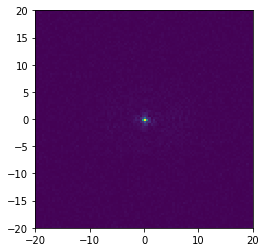

In [15]:
imgplot = plt.imshow(abs(fhat2), extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])

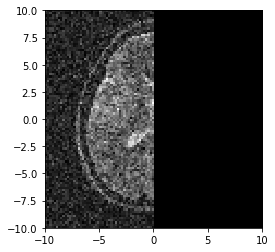

In [17]:
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))
imgplot = plt.imshow(abs(f2),extent = [u[0], u[n-1], u[0], u[n-1]],cmap='gray')